2798905.5 2799319.7909778557 2816680.2090221443 2817094.5


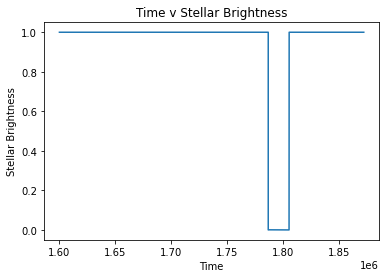

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter
import astropy.constants as con
import astropy.units as u
import math as m
%matplotlib inline

#variables
massExoplanet = 8.599968 * 10**24
massStar = 9.5473 * 10**29

rPlanet = 7454153
rStar = 3.2728 * 10**8 
rOrbit = 6.46263 * 10**10

v0 = 35985.10901 #meters/second
#w = (2 * np.pi)/period #angular acc, meters/second

period = 130 * 24 * 60 * 60 #seconds
trasitTime = int((2 * rStar) / v0) #8189
data = []


#intersecting area functions
def intersection_area(d, R, r):
    """Return the area of intersection of two circles.
    The circles have radii R and r, and their centres are separated by d. """
    if d <= abs(R-r):
        # One circle is entirely enclosed in the other.
        return np.pi * min(R, r)**2
    if d >= r + R:
        # The circles don't overlap at all.
        return 0

    r2, R2, d2 = r**2, R**2, d**2
    alpha = np.arccos((d2 + r2 - R2) / (2*d*r))
    beta = np.arccos((d2 + R2 - r2) / (2*d*R))
    
    return (r2 * alpha + R2 * beta - 0.5 * (r2 * np.sin(2*alpha) + R2 * np.sin(2*beta)))


    
x = np.linspace(0, period//2, 100)

t1 = (period/4) - (trasitTime/2)
t2 = t1 + ((2 * rPlanet)/v0)
t3 = (period/4) + (trasitTime/2) - ((2 * rPlanet)/v0)
t4 = t3 + ((2 * rPlanet)/v0)

print(t1, t2, t3, t4)



#slope of the overlap


for time in np.arange(1.6 * 10**6, period//6):  
    d = abs(rOrbit - (v0 * time))
    #d = np.abs(rStar - (v0 * np.sin(w * time))) #with angular acceleration
    
    area = intersection_area(d, rStar, rPlanet)   
    depth = (np.sqrt(area/np.pi) / rStar)**2
    
    if depth == 0:
        data.append(1)
    else:
        data.append(depth)



plt.figure()
plt.title("Time v Stellar Brightness")
plt.xlabel("Time")
plt.ylabel("Stellar Brightness")
plt.plot(np.arange(1.6 * 10**6, period//6), data)
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import scipy
import scipy.integrate

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FFMpegWriter
from matplotlib import animation

%matplotlib qt 



#variables
massExoplanet = 8.599968 * 10**24
massStar = 9.5473 * 10**29

rPlanet = 7454153
rStar = 3.2728 * 10**8 
rOrbit = 6.46263 * 10**10

v0 = 35985.10901 #meters/second
#w = (2 * np.pi)/period #angular acc, meters/second

period = 130 * 24 * 60 * 60 #seconds
trasitTime = int((2 * rStar) / v0) #8189
data = []


# set up plot
fig = plt.figure()
ax = plt.axes(xlim=(1.6 * 10**6, period//6), ylim=(-.5, 1.5))
line, = ax.plot([], [], lw=3)


plt.title("Time v Stellar Brightness")
plt.xlabel("Time (in seconds)")
plt.ylabel("Stellar Brightness")
#plt.plot(np.arange(0, period//4), data)


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# -------------- plotting data ----------------- #

# intersecting area functions
def intersection_area(d, R, r):
    """Return the area of intersection of two circles.
    The circles have radii R and r, and their centres are separated by d. """
    if d <= abs(R-r):
        # One circle is entirely enclosed in the other.
        return np.pi * min(R, r)**2
    if d >= r + R:
        # The circles don't overlap at all.
        return 0

    r2, R2, d2 = r**2, R**2, d**2
    alpha = np.arccos((d2 + r2 - R2) / (2*d*r))
    beta = np.arccos((d2 + R2 - r2) / (2*d*R))
    
    return (r2 * alpha + R2 * beta - 0.5 * (r2 * np.sin(2*alpha) + R2 * np.sin(2*beta)))

for time in np.arange(0, period//4):  
    d = abs(rOrbit - (v0 * time))
    #d = np.abs(rStar - (v0 * np.sin(w * time))) #with angular acceleration
    
    area = intersection_area(d, rStar, rPlanet)   
    depth = (np.sqrt(area/np.pi) / rStar)**2
    
    if depth == 0:
        data.append(1)
    else:
        data.append(depth)
        
# -------------- plotting data ----------------- #


# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, period//4, 1000)
    y = data #set array to variable?
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
# https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()


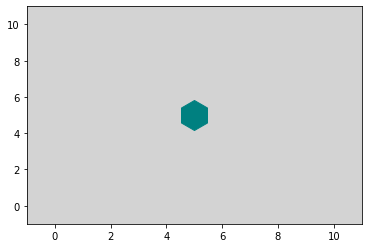

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
plt.close('all')
colors = [ 'teal']

fig_animate, ax = plt.subplots()
dots = []

dots.append(ax.plot([], [], linestyle='none', marker='h', markersize=30, color=colors[0]))

ax.set_xlim([-1,11])
ax.set_ylim([-1,11])

data=np.round(3*np.sin(np.linspace(0,6*np.pi,100))+5)

def animate(z):
    dots[0][0].set_data(data[z],data[z])
    return dots

anim = animation.FuncAnimation(fig_animate, animate, frames=len(data), blit=False)

ax.set_facecolor('#d3d3d3')
writer = animation.writers['ffmpeg'](fps=10)
dpi=300

anim.save('dot.mp4', writer=writer,dpi=dpi)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter
import astropy.constants as con
import astropy.units as u
import math as m
%matplotlib inline

#variables
massExoplanet = 8.599968 * 10**24
massStar = 9.5473 * 10**29


rPlanet = 7454153
rStar = 3.2728 * 10**8 
rOrbit = 6.46263 * 10**10

period = 130 * 24 * 60 * 60 #seconds
timeOfTransit = 3883.2794628313313 #seconds

v0 = 35985.10901 #meters/second
w = (2 * np.pi)/period #angular acc, meters/second
overlapTime = int((2 * rStar) / v0)
data = []


#intersecting area functions
def intersection_area(d, R, r):
    """Return the area of intersection of two circles.
    The circles have radii R and r, and their centres are separated by d. """
    if d <= abs(R-r):
        # One circle is entirely enclosed in the other.
        return np.pi * min(R, r)**2
    if d >= r + R:
        # The circles don't overlap at all.
        return 0

    r2, R2, d2 = r**2, R**2, d**2
    alpha = np.arccos((d2 + r2 - R2) / (2*d*r))
    beta = np.arccos((d2 + R2 - r2) / (2*d*R))
    
    return (r2 * alpha + R2 * beta - 0.5 * (r2 * np.sin(2*alpha) + R2 * np.sin(2*beta)))

#slope of the overlap
for time in np.arange(0, overlapTime):  
    d = abs(rStar - (v0 * time))
    #d = np.abs(rStar - (v0 * np.sin(w * time))) #with angular acceleration
    
    area = intersection_area(d, rStar, rPlanet)   
    depth = (np.sqrt(area/np.pi) / rStar)**2
    
    data.append((1/depth))
    
#plt.plot(range(overlapTime), data)
